<a href="https://colab.research.google.com/github/alexanderbeleno16/algoritmo_exposicion_parcial2/blob/main/algoritmo_exposicion_parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL CORTE 2 MI 2024-1 NOCTURNO**

## CORPORACIÓN UNIVERSITARIA LATINOAMERICANA

### PRESENTADO POR:

### ALEXANDER BELEÑO, VANESSA BAENA, ANDREA JABBA, STIVEN MORALES


## **INFORMACIÓN RELACIONADA AL DATASET**

Estos datos estudian si una persona aceptará el cupón que le recomiendan en diferentes escenarios de conducción.

Estos datos se recopilaron a través de una encuesta en Amazon Mechanical Turk. La encuesta describe diferentes escenarios de conducción, incluido el destino, la hora actual, el clima, el pasajero, etc., y luego pregunta a la persona si aceptará el cupón si es el conductor. Para obtener más información sobre el conjunto de datos, consulte el artículo: Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl y Perry MacNeille. "Un marco bayesiano para aprender conjuntos de reglas para una clasificación interpretable". La Revista de Investigación sobre Aprendizaje Automático 18, no. 1 (2017): 2357-2393.

## **REFERENCIA DEL DATASET**
https://archive.ics.uci.edu/dataset/603/in+vehicle+coupon+recommendation

## **IMPORTACIÓN DE LIBRERIAS**
En esta sección del código se realizan las importaciones correspondientes a cada librería que permitiran la realización exitosa de la lectura y el tratamiento de los datos del archivo ".csv".

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Normalización
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# Balanceo
from imblearn.over_sampling import SMOTE
# Vectorización
from sklearn.feature_extraction.text import CountVectorizer

# Pruebas y Entrenamiento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer

# Aplicar Modelo Gradient(GBM)
import lightgbm as lgb

!pip install scikit-plot
import scikitplot as skplt
from sklearn import metrics

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix



**Pandas (pd):** Para manipulación y análisis de datos, nos ofrece los dataframe.

**NumPy (np):** Para operaciones Matematicas/numéricas.

**Matplotlib.pyplot (plt):** Para crear gráficos/visualizaciones de datos.



**MinMaxScaler:** Para realizar la Normalización.

**train_test_split:** Para realizar las pruebas y Entrenamiento.

**GradientBoostingClassifier, classification_report, confusion_matrix:** Para aplicar el modelo Gradient(GBM).

## **CARGUE Y LECTURA DEL ARCHIVO CSV**
En esta sección del código se carga los datos del archivo CSV en un objeto llamado data_frame

In [364]:
data_frame = pd.read_csv('drive/MyDrive/files/in-vehicle-coupon-recommendation.csv')

## **Métodos para el análisis exploratorio (univariado y bivariado)**

### **info()**
Proporciona información sobre el DataFrame, incluyendo el número de filas y columnas, los tipos de datos en cada columna y la cantidad de memoria utilizada.

In [365]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### **describe()**
Calcula estadísticas descriptivas para cada columna numérica, como media, desviación estándar, mínimo, máximo, etc.

In [366]:
data_frame.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### **head()**
Muestra las primeras filas del DataFrame, lo que permite una vista previa rápida de los datos.

In [367]:
data_frame.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### **unique()**
Obtiene los valores unicos de una columna en especifico.

In [368]:
# Obtener los valores únicos por cada columna
valores_unicos_por_columna = {}
for columna in data_frame.columns:
    valores_unicos_por_columna[columna] = data_frame[columna].unique()

# Mostrar los valores únicos por cada columna
for columna, valores_unicos in valores_unicos_por_columna.items():
    print(f"Valores únicos en la columna '{columna}':")
    print(valores_unicos)
    print()

Valores únicos en la columna 'destination':
['No Urgent Place' 'Home' 'Work']

Valores únicos en la columna 'passanger':
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Valores únicos en la columna 'weather':
['Sunny' 'Rainy' 'Snowy']

Valores únicos en la columna 'temperature':
[55 80 30]

Valores únicos en la columna 'time':
['2PM' '10AM' '6PM' '7AM' '10PM']

Valores únicos en la columna 'coupon':
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Valores únicos en la columna 'expiration':
['1d' '2h']

Valores únicos en la columna 'gender':
['Female' 'Male']

Valores únicos en la columna 'age':
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Valores únicos en la columna 'maritalStatus':
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Valores únicos en la columna 'has_children':
[1 0]

Valores únicos en la columna 'education':
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate de

### **mean()**

La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos. En pandas, el método que funciona para obtener el promedio o la media es mean().

In [369]:
# Seleccionar solo las columnas numéricas
columnas_numericas = data_frame.select_dtypes(include=[np.number])

# Calcular la media por cada columna numérica
media_por_columna = columnas_numericas.mean()

# Mostrar la media por cada columna
print("Media por cada columna:")
print(media_por_columna)

Media por cada columna:
temperature          63.301798
has_children          0.414144
toCoupon_GEQ5min      1.000000
toCoupon_GEQ15min     0.561495
toCoupon_GEQ25min     0.119126
direction_same        0.214759
direction_opp         0.785241
Y                     0.568433
dtype: float64


### **mode()**

En Pandas, el método mode() se utiliza para calcular la moda de un DataFrame o de una Serie. La moda representa el valor que aparece con mayor frecuencia en un conjunto de datos.

Cuando aplicas mode() a un DataFrame, el método devuelve un nuevo DataFrame que contiene las modas de cada columna. Si hay varios valores que son igualmente frecuentes y son la moda, mode() devolverá todos esos valores.

In [370]:
# Calcular la moda por cada columna
moda_por_columna = data_frame.mode()

# Mostrar la moda por cada columna
print("Moda por cada columna:")
# print(moda_por_columna)
moda_por_columna

Moda por cada columna:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,80.0,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,1.0,1.0,0.0,0.0,1.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **median()**
En pandas, el método que funciona para obtener la mediana es **median()**.

In [371]:
# Seleccionar solo las columnas numéricas
columnas_numericas = data_frame.select_dtypes(include=[np.number])

# Calcular la mediana por cada columna numérica
mediana_por_columna = columnas_numericas.median()

# Mostrar la mediana por cada columna
print("Mediana por cada columna:")
print(mediana_por_columna)


Mediana por cada columna:
temperature          80.0
has_children          0.0
toCoupon_GEQ5min      1.0
toCoupon_GEQ15min     1.0
toCoupon_GEQ25min     0.0
direction_same        0.0
direction_opp         1.0
Y                     1.0
dtype: float64


## **Gráficos**


### Bigote

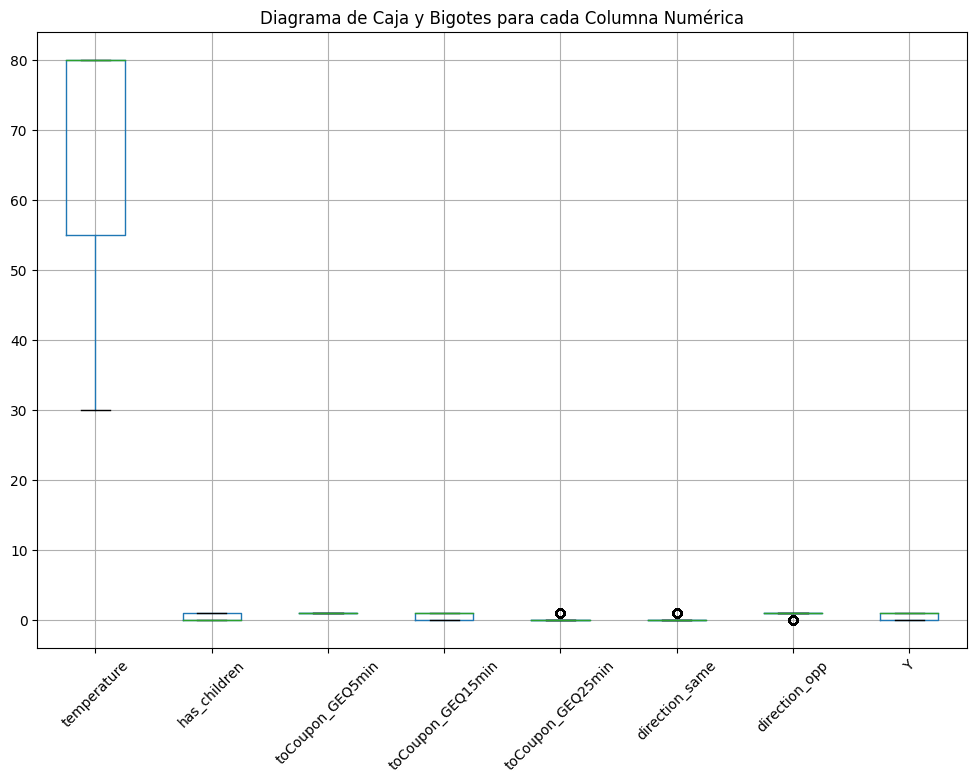

In [372]:
# Filtrar solo las columnas numéricas
numeric_columns = data_frame.select_dtypes(include=['int64', 'float64'])

# Graficar un diagrama de caja y bigotes para cada columna numérica
plt.figure(figsize=(12, 8))
numeric_columns.boxplot()
plt.title('Diagrama de Caja y Bigotes para cada Columna Numérica')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.show()


### Histograma

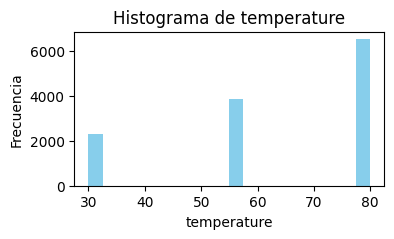

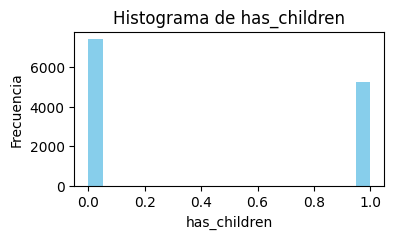

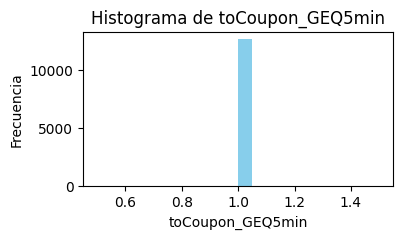

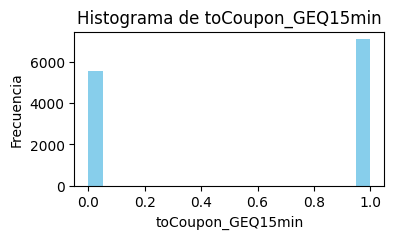

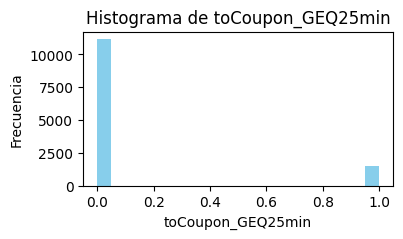

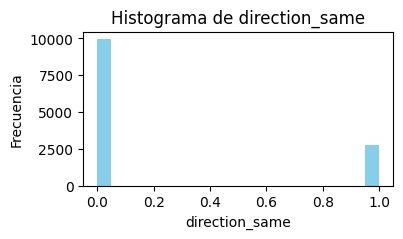

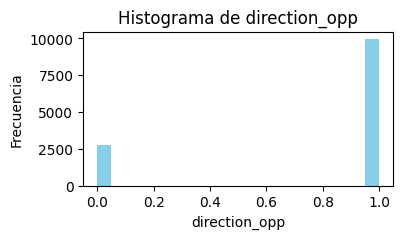

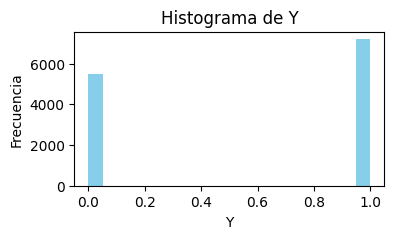

In [373]:
# Seleccionar solo las columnas numéricas
numeric_columns = data_frame.select_dtypes(include=['int64'])

# Graficar histograma para cada columna numérica
for column in numeric_columns.columns:
    plt.figure(figsize=(4, 2))
    plt.hist(data_frame[column], bins=20, color='skyblue')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()


### Dispersión

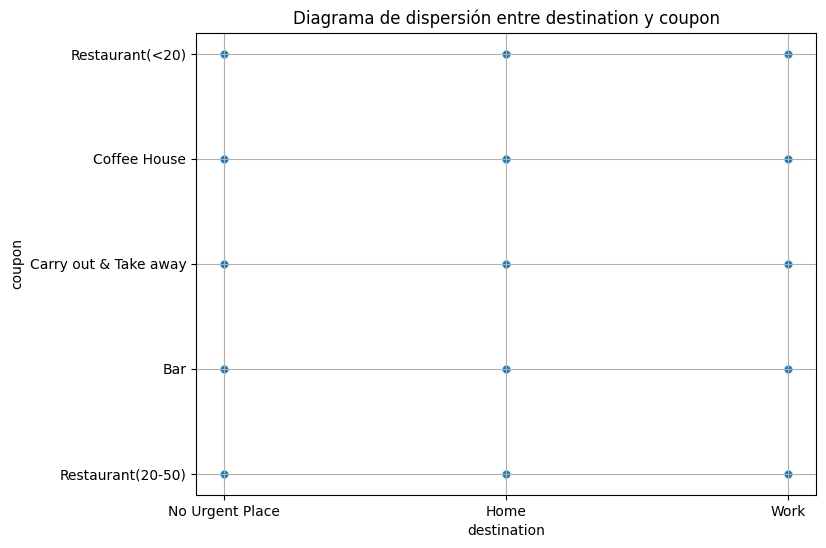

In [374]:
# Importar librerías
import seaborn as sns

# Seleccionar las dos columnas numéricas que deseas comparar
x_column = 'destination'
y_column = 'coupon'

# Graficar el diagrama de dispersión con Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_frame, x=x_column, y=y_column, alpha=0.5)
plt.title(f'Diagrama de dispersión entre {x_column} y {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()


### Matriz de correlación

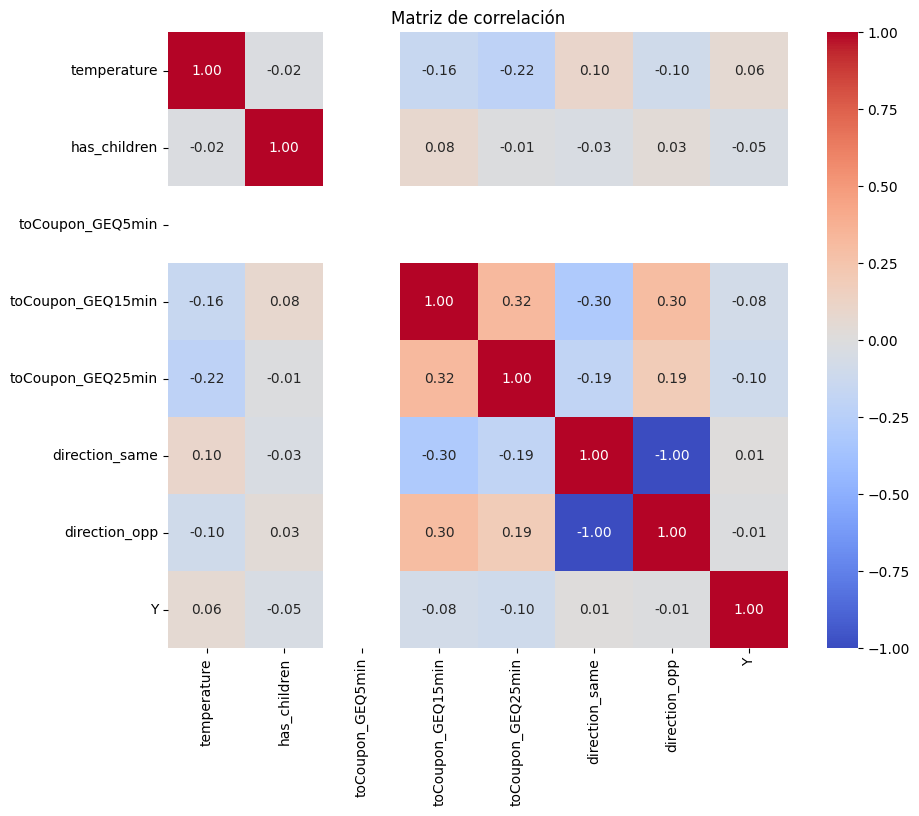

In [375]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = data_frame.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()


### Barras apiladas o de líneas múltiples

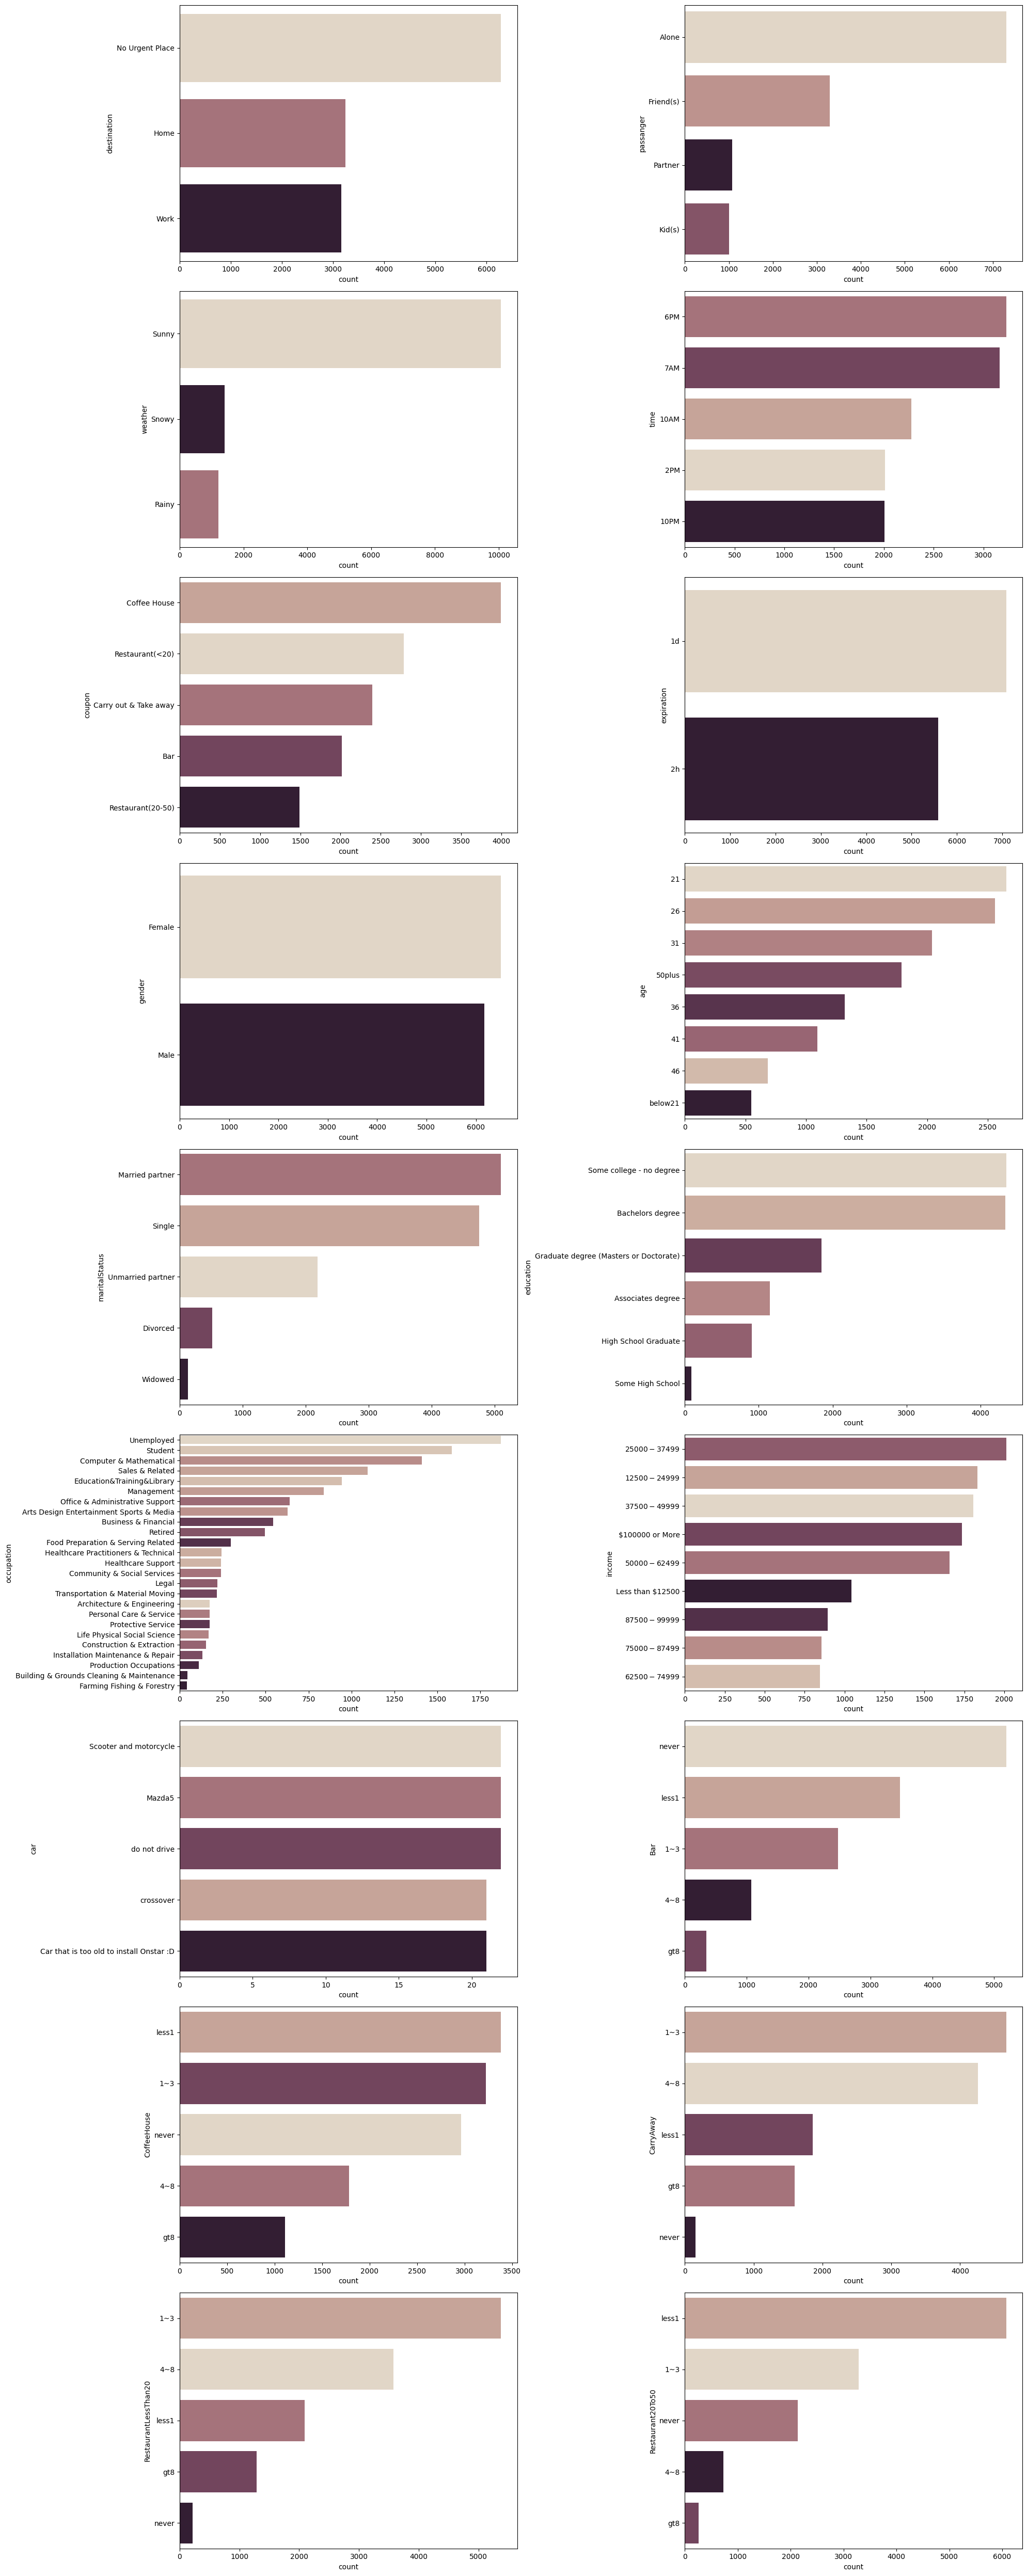

In [376]:
# Graficar gráfico de barras apiladas o de líneas múltiples
fig, axes = plt.subplots(9, 2, figsize=(20,50))
axes = axes.flatten()

for ax, col in zip(axes, data_frame.select_dtypes('object').columns):
    sns.countplot(y=col, legend=False, hue=col, data=data_frame, ax=ax,
                  palette="ch:.25", order=data_frame[col].value_counts().index);

plt.tight_layout()
plt.show()


## Valores Faltantes/Nulos
Se obtiene por columna la cantidad de registros con valores nulos

In [377]:
print(data_frame.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


## Preprocesamiento
Filtrar por cada columna, todos los valores nulos para luego reemplazarlos por la moda de cada columna correspondiente

In [378]:
data_frame.fillna(data_frame.mode().iloc[0], inplace=True)

print(data_frame.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


In [379]:
# Copiar el DataFrame original
df_copy_norm = data_frame.copy()
df_copy_balance = data_frame.copy()
df_copy_vectorize = data_frame.copy()

## Normalización

In [380]:
# Normalización de variables numéricas en la copia df_copy_norm
scaler = StandardScaler()
numerical_columns = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp']
df_copy_norm[numerical_columns] = scaler.fit_transform(data_frame[numerical_columns])

# Verificación de resultados
print("Copia del dataframe con normalización:")
df_copy_norm.head()

Copia del dataframe con normalización:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,-0.433430,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,0.0,-1.131581,-0.367745,-0.522967,0.522967,1
1,No Urgent Place,Friend(s),Sunny,0.871799,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,0.0,-1.131581,-0.367745,-0.522967,0.522967,0
2,No Urgent Place,Friend(s),Sunny,0.871799,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,0.0,0.883720,-0.367745,-0.522967,0.522967,1
3,No Urgent Place,Friend(s),Sunny,0.871799,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,0.0,0.883720,-0.367745,-0.522967,0.522967,0
4,No Urgent Place,Friend(s),Sunny,0.871799,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,0.0,0.883720,-0.367745,-0.522967,0.522967,0


## Balanceo

In [381]:
# Convertir variables categóricas en variables numéricas
categorical_columns = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
vectorizer = CountVectorizer()
for column in categorical_columns:
    # Generar la matriz dispersa
    sparse_matrix = vectorizer.fit_transform(data_frame[column].astype(str))
    # Convertir la matriz dispersa en un DataFrame de pandas
    column_names = [f'{column}_{word}' for word in vectorizer.get_feature_names_out()]
    df_sparse = pd.DataFrame(sparse_matrix.todense(), columns=column_names)
    # Asignar el DataFrame resultante a las columnas correspondientes del dataframe original
    df_copy_balance = pd.concat([df_copy_balance.drop(column, axis=1), df_sparse], axis=1)

# Balanceo de clases (si es necesario) utilizando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df_copy_balance.drop('Y', axis=1), df_copy_balance['Y'])
df_copy_balance = pd.concat([pd.DataFrame(X_resampled, columns=df_copy_balance.drop('Y', axis=1).columns), pd.DataFrame(y_resampled, columns=['Y'])], axis=1)

print("\nCopia del dataframe con balanceo:")
df_copy_balance.head()



Copia del dataframe con balanceo:


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_home,destination_no,destination_place,...,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Y
0,55,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,80,1,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,80,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,80,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,80,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0


## Vectorización

In [382]:
# Convertir variables categóricas en variables numéricas
categorical_columns = ['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
vectorizer = CountVectorizer()
for column in categorical_columns:
    # Generar la matriz dispersa
    sparse_matrix = vectorizer.fit_transform(data_frame[column].astype(str))
    # Convertir la matriz dispersa en un DataFrame de pandas
    column_names = [f'{column}_{word}' for word in vectorizer.get_feature_names_out()]
    df_sparse = pd.DataFrame(sparse_matrix.todense(), columns=column_names)
    # Asignar el DataFrame resultante a las columnas correspondientes del dataframe original
    df_copy_vectorize = pd.concat([df_copy_vectorize.drop(column, axis=1), df_sparse], axis=1)

print("\nCopia del dataframe con vectorización:")
df_copy_vectorize.head()


Copia del dataframe con vectorización:


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_home,destination_no,...,CoffeeHouse_never,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,55,1,1,0,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
1,80,1,1,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,80,1,1,1,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,80,1,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,80,1,1,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Separación de pruebas y entrenamiento

- X contiene las características del DataFrame data_frame, excluyendo las columnas no numéricas que no se normalizaron.
- y contiene las etiquetas que deseas predecir, en este caso, la columna 'Nivel'.
- Utilizamos la función train_test_split para dividir X e y en conjuntos de entrenamiento y prueba. Especificamos que el 80% de los datos se utilizarán para entrenamiento (train_size=0.8) y el 20% para pruebas (test_size=0.2).
- random_state se establece en un valor específico (en este caso, 42) para garantizar la reproducibilidad de la división.

In [383]:
X = df_copy_norm.drop(columns=['Y'])
y = df_copy_norm.Y
X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=0, test_size=0.2)

In [384]:
num_features = X_train.select_dtypes(['int64', 'float64']).columns
cat_features = X_train.select_dtypes(['object']).columns
full_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])
X_train = full_pipeline.fit_transform(X_train)
X_test = full_pipeline.transform(X_test)

In [385]:
X_train.shape, X_test.shape

((10147, 114), (2537, 114))

## Aplicación del modelo GRADIANT (GBM)

- Importamos GradientBoostingClassifier desde sklearn.ensemble.
- Creamos una instancia del modelo de Gradient Boosting Classifier llamada gbm_model.
- Entrenamos el modelo utilizando el método fit() con los conjuntos de entrenamiento (X_train y y_train).
- Realizamos predicciones sobre los datos de prueba utilizando el método predict() con el conjunto de características de prueba (X_test), y guardamos las predicciones en la variable y_pred.

In [386]:
# Crear el modelo de Gradient Boosting Classifier
gbm_model = GradientBoostingClassifier()

# Entrenar el modelo con los datos de entrenamiento
gbm_model.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = gbm_model.predict(X_test)


Mostrar reportes y  matrix de confusión

In [387]:
# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.58      0.64      1111
           1       0.71      0.81      0.76      1426

    accuracy                           0.71      2537
   macro avg       0.71      0.70      0.70      2537
weighted avg       0.71      0.71      0.71      2537

[[ 649  462]
 [ 273 1153]]


## PRUEBA DE PREDECIR Y COMPARAR

En cada línea, se muestran los datos reales y las predicciones correspondientes realizadas por el modelo.

**Datos reales:** Se refiere a las etiquetas reales de los ejemplos seleccionados del conjunto de prueba.

**Predicción:** Se refiere a las etiquetas predichas por el modelo para esos mismos ejemplos.

In [388]:
# Seleccionar un grupo de datos para predecir
X_prueba = X_test[:25]
y_prueba_real = y_test[:25]

# Realizar predicciones con el modelo
y_prueba_pred = gbm_model.predict(X_prueba)

# Comparar las predicciones con las etiquetas reales
for i in range(len(y_prueba_real)):
    print(f"Datos reales: {y_prueba_real.iloc[i]} - Predicción: {y_prueba_pred[i]}")


Datos reales: 0 - Predicción: 1
Datos reales: 1 - Predicción: 1
Datos reales: 0 - Predicción: 0
Datos reales: 1 - Predicción: 1
Datos reales: 0 - Predicción: 1
Datos reales: 0 - Predicción: 0
Datos reales: 1 - Predicción: 1
Datos reales: 1 - Predicción: 1
Datos reales: 1 - Predicción: 0
Datos reales: 1 - Predicción: 1
Datos reales: 0 - Predicción: 0
Datos reales: 1 - Predicción: 1
Datos reales: 1 - Predicción: 1
Datos reales: 1 - Predicción: 1
Datos reales: 0 - Predicción: 1
Datos reales: 1 - Predicción: 1
Datos reales: 0 - Predicción: 1
Datos reales: 0 - Predicción: 1
Datos reales: 1 - Predicción: 1
Datos reales: 1 - Predicción: 0
Datos reales: 0 - Predicción: 0
Datos reales: 0 - Predicción: 1
Datos reales: 0 - Predicción: 1
Datos reales: 0 - Predicción: 1
Datos reales: 1 - Predicción: 1
